In [1]:
#DL Project: calssification Task.
#in vanilla NN: input layer should be flattened to 1D array.
#we will be working with a fully connected layers.
#we will be using the MNIST dataset. (get it from keras.datasets).
#almost al hidden layers in general use the same activation function. (relu).
#for classification tasks (softmanx) is used in the output layer.
#the output layer is laso a dense layer same as the hidden layers but with a different activation function.
#the output layer's neurons number depends on the task itself.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
fashion_mnist = keras.datasets.fashion_mnist                                              #laoding the dataset (fasion_mnist)
(x_train_full , y_train_full) , (x_test , y_test) = fashion_mnist.load_data()

In [4]:
x_train_full.shape   #shape of the training set

(60000, 28, 28)

In [5]:
x_test.shape         #shape of x_test

(10000, 28, 28)

In [6]:
#to split the dataset into training set, validation set & test set:

x_valid , x_train = x_train_full[50000:]/255. , x_train_full[:50000]/255.
y_valid , y_train = y_train_full[50000:] , y_train_full[:50000]
x_test = x_test/255.

In [7]:
x_train_full.dtype                       #to make sure that the pixel values is from 0 to 255

dtype('uint8')

In [8]:

x_valid.shape


(10000, 28, 28)

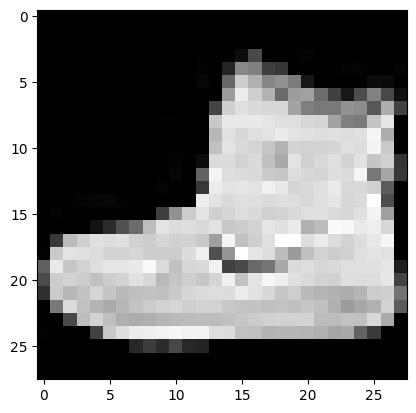

In [9]:
plt.imshow(x_train[0], cmap='gray')
plt.axis
plt.show()

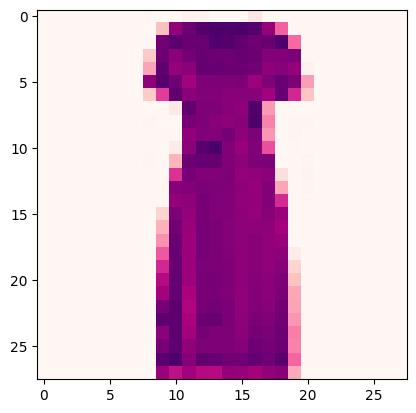

In [10]:
plt.imshow(x_train[50], cmap='RdPu')       #cmap argument can be: (Greys, Purples, Blues, Greens, Oranges, Reds, YlOrBr, YlOrRd, OrRd, PuRd, RdPu, BuPu, GnBu, PuBu, YlGnBu, PuBuGn, BuGn, YlGn, binary, gist_yarg, gist_gray, gray, bone, pink, spring, summer, autumn, winter, cool, Wistia, hot, afmhot, gist_heat, copper)
plt.axis
plt.show()

In [11]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [12]:
#labels of the data set:
# 0 - T-shirt/top
# 1 - Trouser
# 2 - Pullover
# 3 - Dress
# 4 - Coat
# 5 - Sandal
# 6 - Shirt
# 7 - Sneaker
# 8 - Bag
# 9 - Ankle boot


In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
class_names[y_train[50]]

'Dress'

In [15]:
#creating our NN layers:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))      #input layer
model.add(keras.layers.Dense(300, activation="relu", name='FirstDense'))     #hidden layer1           #300: number of neurons,  Dense: fully connected layer , activation: activation function
model.add(keras.layers.Dense(100, activation="relu" , name='SecondDense'))     #hidden layer2         #naming the layers is of course optional.
model.add(keras.layers.Dense(10, activation="softmax"))    #output layer
#______________________________________________________________________________________________________________________________
#this could have been written as:
#model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]), keras.layers.Dense(300, activation="relu"), keras.layers.Dense(100, activation="relu"), keras.layers.Dense(10, activation="softmax")])
#but the first way is more readable.

In [16]:
model.layers

In [17]:
#number of weight and bias for the 1st hidden layer is (300*28*28)Weights + (300)bias = 235500
#number of weights and bias for the 2nd hidden layer is (100*300)Weights + (100)bias = 30100
#number of weights and bias for the 3rd hidden layer is (10*100)Weights + (10)bias = 1010
#total number of weights and bias is 235500+30100+1010 = 266610
#to know them directly: model.summary()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 FirstDense (Dense)          (None, 300)               235500    
                                                                 
 SecondDense (Dense)         (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
keras.utils.plot_model(model, "fashion_mnist.png" ,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
hidden1 = model.layers[1]
weights1, biases1 = hidden1.get_weights()
print(weights1.shape)
print(biases1.shape)

(784, 300)
(300,)


In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])   #this is to compile the model (loss function, optimizer, metrics)

In [22]:
history = model.fit(x_train , y_train , epochs = 50 , validation_data = (x_valid , y_valid))
#if we add this line again in a new cell it will continue from the last epoch (it will not start from the beginning).

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7513 - accuracy: 0.7514 - val_loss: 0.5373 - val_accuracy: 0.8128
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4986 - accuracy: 0.8267 - val_loss: 0.4844 - val_accuracy: 0.8302
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4492 - accuracy: 0.8428 - val_loss: 0.5031 - val_accuracy: 0.8197
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4221 - accuracy: 0.8518 - val_loss: 0.4309 - val_accuracy: 0.8482
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4003 - accuracy: 0.8599 - val_loss: 0.4551 - val_accuracy: 0.8417
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3844 - accuracy: 0.8650 - val_loss: 0.3943 - val_accuracy: 0.8600
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3707 - accuracy: 0.8697 - val_loss: 0.3904 - val_accuracy:

In [23]:
#notice that the accuracy is 96 while the validation accuracy is 89. this is called overfitting.
#i close vs and reopen it to restart the session to restore the old model that didn't overfit yet.
#you will now find the accurcay is 94 and the val accuracy is 88. this is close to overfitting but better than the previous results.

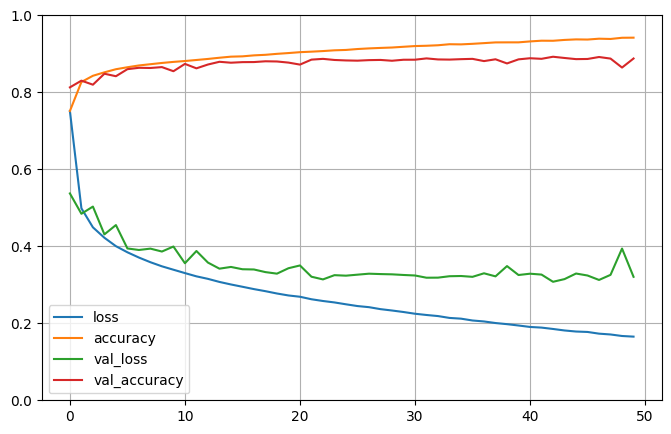

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8842


[0.34337368607521057, 0.8841999769210815]

In [28]:
#to evaluate only the first sample:
model.evaluate(x_test[0:1], y_test[0:1])

1/1 [==============================] - 0s 20ms/step - loss: 9.8847e-04 - accuracy: 1.0000


[0.0009884715545922518, 1.0]

In [29]:
x_new = x_test[:3]                           #we took the first 3 rows of the test set and predicted the probabilities of each class for each row
yprob = model.predict(x_new)
yprob.round(2)

1/1 [==============================] - 0s 64ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
y_pred = np.argmax(model.predict(x_new), axis=1)                   #we got the labels of the predicted images
y_pred

1/1 [==============================] - 0s 8ms/step


array([9, 2, 1], dtype=int64)

In [33]:
np.array(class_names)[y_pred]                                      #to know the predicted class itself

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')